In [2]:
# Als aller erstes müssen wir noch eine Bibliothek installieren
!pip install face_recognition

     |████████████████████████████████| 100.2MB 105kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=4c5e9a1c8d11496670c0cfd2efcb27eb72fcd11a6f0262c83aa48d90379ec3ce
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
# Wir machen google-drive dem Notebook bekannt, um Zugriff auf die Daten zu erhalten
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Diese Bibliothek stellt die Methoden zur Verfügung, die wir brauchen, 
# um Gesichter zu erkennen und wieder zu erkennen
import face_recognition

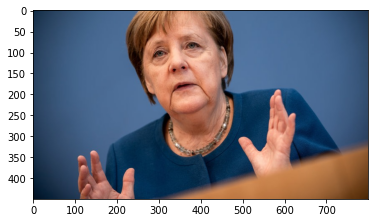

In [6]:
# Das Beispielbild wird zu nächst geladen
image_path = '/content/drive/MyDrive/hackerschool/images/dpa-3872~_v-800x450_c-1584563602179.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# So sieht das original Bild aus
plt.imshow(image)
plt.show()

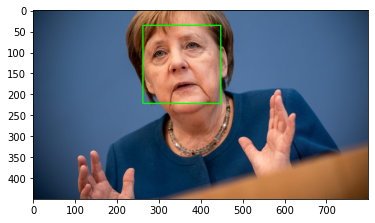

In [19]:
# Es wird eine Kopie des Originalbilds erzeugt, um dieses nicht zu verändern
image_location = image.copy()

# Wir suchen das Gesicht in dem Bild
face_locations = face_recognition.face_locations(image)
y1, y2, x1, x2 = face_locations[0]

# Und malen eine grüne Box herum
cv2.rectangle(image_location, (x2, x1), (y2, y1), (0, 255,0), 2)

plt.imshow(image_location)
plt.show()

In [20]:
# Wir suchen alle Gesichtselement, die in dem Bild vorhanden sind
face_landmarks_list = face_recognition.face_landmarks(image)

# und finden diese Elemente in dem ersten Gesicht
face_lendmarks = face_landmarks_list[0]
for element, values in face_lendmarks.items():
  print(element)

chin
left_eyebrow
right_eyebrow
nose_bridge
nose_tip
left_eye
right_eye
top_lip
bottom_lip


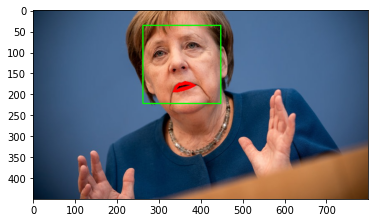

In [22]:
# Jetzt können wir zum Beispiel ein bisschen Lippenstift auftragen
top_lip = np.asarray(face_lendmarks['top_lip']).reshape((-1, 1, 2))
bottom_lip = np.asarray(face_lendmarks['bottom_lip']).reshape((-1, 1, 2))
cv2.fillPoly(image_location, [top_lip], (255, 0, 0), 8)
cv2.fillPoly(image_location, [bottom_lip], (255, 0, 0), 8)

plt.imshow(image_location)
plt.show()

In [23]:
# Diese Methode gibt einen Vektor mit Werten zurück, welche die Merkmale des Gesichts beschreiben. 
# Diese Methode werden wir später noch gebrauchen
encodings = face_recognition.face_encodings(image)

In [ ]:
# Probiert eigene Bilder aus. Nehmt Bilder aus dem Internet oder eigene Bilder
# und versucht dann mit den gezeigten Methoden die Gesichter auf den Bilder
# erkennen zu lassen

# Müssen die Gesichter alle frontal schauen oder werden auch Gesichter im Profil erkannt?
# Wie zeichnet ihr die Bounding-Boxes ein, wenn mehr als ein Gesicht in einem Bild ist?
# Wie sähe ein Bild aus, in dem man die Farbe der Augenbrauen oder der Nase ändert?

